**Ali Abd-Elrahman Hegazy**\
**Ahmed Abd-Elsalam Muhammed Afify**

# Network-Flow (Ford-Fulkerson):

In [2]:
# This class represents a directed graph
# using adjacency matrix representation
class Graph:
 
    def __init__(self, graph):
        self.graph = graph  # residual graph
        self. ROW = len(graph)
 
    '''Returns true if there is a path from source 's' to sink 't' in
    residual graph. Also fills parent[] to store the path '''
 
    def BFS(self, s, t, parent): 
        visited = [False]*(self.ROW) 
        queue = []
 
        queue.append(s)
        visited[s] = True
 
        while queue: 
            u = queue.pop(0) 
            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u
                    if ind == t:
                        return True 
        return False
             
     
    # Returns tne maximum flow from s to t in the given graph
    def FordFulkerson(self, source, sink):
 
        parent = [-1]*(self.ROW) 
        max_flow = 0 

        while self.BFS(source, sink, parent) : 
            path_flow = float("Inf")
        #########################################################################
            # Find the max. flow through that path
            s = sink
            while(s !=  source):
                path_flow = min (path_flow, self.graph[parent[s]][s])
                s = parent[s]
        #########################################################################
            max_flow +=  path_flow
        #########################################################################
            # update residual capacities of the edges and reverse edges along the path
            v = sink
            while(v !=  source):
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]
 
        return self.graph, max_flow

## We will use network module to draw our network:

In [3]:
import networkx as nx
import numpy as np

___
## Using our code:

**Now after constructing the class we will test it**

In [5]:
import matplotlib.pyplot as plt

Before implementing the code our residual graph would be like: 

[[ 0 16 13  0  0  0]
 [ 0  0 10 12  0  0]
 [ 0  4  0  0 14  0]
 [ 0  0  9  0  0 20]
 [ 0  0  0  7  0  4]
 [ 0  0  0  0  0  0]]


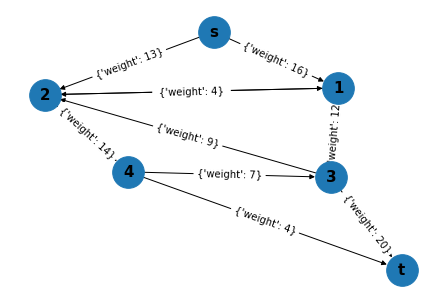

In [6]:
graph = [[0, 16, 13, 0, 0, 0],
        [0, 0, 10, 12, 0, 0],
        [0, 4, 0, 0, 14, 0],
        [0, 0, 9, 0, 0, 20],
        [0, 0, 0, 7, 0, 4],
        [0, 0, 0, 0, 0, 0]]

print ("Before implementing the code our residual graph would be like: \n")

graph = np.array(graph)
print(graph)
G = nx.DiGraph(graph)

mylabels = {0:'s', 1:'1', 2:'2', 3:'3', 4:'4', 5:'t'}
layout = nx.spring_layout(G)

nx.draw(G, layout, labels=mylabels, with_labels=True, node_size=1000, font_weight='bold', font_size=15)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

The maximum possible flow is 23 

After implementing the code our residual graph would be like: 

[[ 0  4  2  0  0  0]
 [12  0 10  0  0  0]
 [11  4  0  0  3  0]
 [ 0 12  9  0  7  1]
 [ 0  0 11  0  0  0]
 [ 0  0  0 19  4  0]]


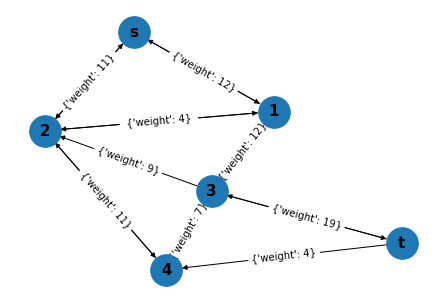

In [63]:
g = Graph(graph)
source = 0; sink = 5
residual_graph, flow = g.FordFulkerson(source, sink)
print ("The maximum possible flow is %d " % flow)
print ("\nAfter implementing the code our residual graph would be like: \n")
print(residual_graph)

graph = np.array(residual_graph)
G = nx.DiGraph(graph)

mylabels = {0:'s', 1:'1', 2:'2', 3:'3', 4:'4', 5:'t'}
layout = nx.spring_layout(G)
nx.draw(G, layout, labels=mylabels, with_labels=True, node_size=1000, font_weight='bold', font_size=15)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

___
## Another Graph:

Before implementing the code our residual graph would be like: 



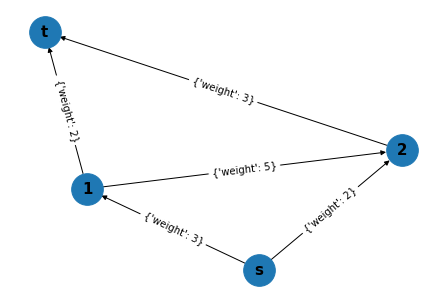

In [64]:
graph = [[0, 3, 2, 0],
        [0, 0, 5, 2],
        [0, 0, 0, 3],
        [0, 0, 0, 0]]

print ("Before implementing the code our residual graph would be like: \n")

graph = np.array(graph)
G = nx.DiGraph(graph)

mylabels = {0:'s', 1:'1', 2:'2', 3:'t'}
layout = nx.spring_layout(G)

nx.draw(G, layout, labels=mylabels, with_labels=True, node_size=1000, font_weight='bold',    font_size=15)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()

The maximum possible flow is 5 

After implementing the code our residual graph would be like: 

[[0 0 0 0]
 [3 0 4 0]
 [2 1 0 0]
 [0 2 3 0]]


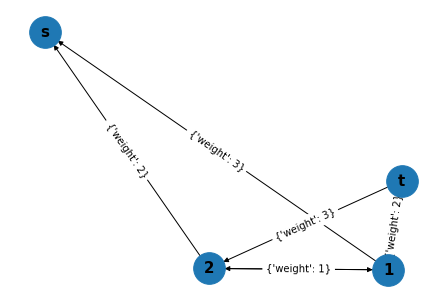

In [65]:
g = Graph(graph)
source = 0; sink = 3
residual_graph, flow = g.FordFulkerson(source, sink)
print ("The maximum possible flow is %d " % flow)
print ("\nAfter implementing the code our residual graph would be like: \n")
print(residual_graph)

graph = np.array(residual_graph)
G = nx.DiGraph(graph)

mylabels = {0:'s', 1:'1', 2:'2', 3:'t'}
layout = nx.spring_layout(G)
nx.draw(G, layout, labels=mylabels, with_labels=True, node_size=1000, font_weight='bold',    font_size=15)
nx.draw_networkx_edge_labels(G, pos=layout)
plt.show()